# Comparing Classifiers for Building Classification Models


In this Jupyter notebook, we will be comparing the performance of different classifiers for building classification models for Breast Cancer Dataset.

## 1. Make breast cancer  dataset

### 1.1. Import library

In [2]:
from sklearn.datasets import make_classification
from sklearn import datasets


### 1.2. Generate the dataset

In [3]:
bc = datasets.load_breast_cancer()

In [4]:
X = bc.data
Y = bc.target

### 1.3. Let's examine the data dimension

In [5]:
X.shape

(569, 30)

In [6]:
Y.shape

(569,)

## 2. Data split (80/20 ratio)

### 2.1. Import library

In [7]:
from sklearn.model_selection import train_test_split

### 2.2. Data split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### 2.3. Let's examine the data dimension

In [9]:
X_train.shape, Y_train.shape

((455, 30), (455,))

In [10]:
X_test.shape, Y_test.shape

((114, 30), (114,))

## 3. Build Classification Models

Modified from: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

### 3.1. Import modules

In [11]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

### 3.2. Defining learning classifiers

In [12]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

### 3.3. Build Model, Apply Model on Test Data & Record Accuracy Scores

In [13]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    scores.append(score)

In [14]:
scores

[0.9122807017543859,
 0.9385964912280702,
 0.8771929824561403,
 0.6403508771929824,
 0.9035087719298246,
 0.9649122807017544,
 0.9298245614035088,
 0.9649122807017544,
 0.9649122807017544,
 0.9122807017543859,
 0.9912280701754386,
 0.9385964912280702,
 0.956140350877193,
 0.9210526315789473]

## 4. Analysis of Model Performance

### 4.1. Import library

In [15]:
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 4.2. Create data frame of *model performance*

In [16]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.912281
1,Linear_SVM,0.938596
2,Polynomial_SVM,0.877193
3,RBF_SVM,0.640351
4,Gaussian_Process,0.903509
5,Gradient_Boosting,0.964912
6,Decision_Tree,0.929825
7,Extra_Trees,0.964912
8,Random_Forest,0.964912
9,Neural_Net,0.912281


### 4.3. Adding colors to the data frame

In [23]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.912281
1,Linear_SVM,0.938596
2,Polynomial_SVM,0.877193
3,RBF_SVM,0.640351
4,Gaussian_Process,0.903509
5,Gradient_Boosting,0.964912
6,Decision_Tree,0.929825
7,Extra_Trees,0.964912
8,Random_Forest,0.964912
9,Neural_Net,0.912281


### 4.4. Bar plot of model performance

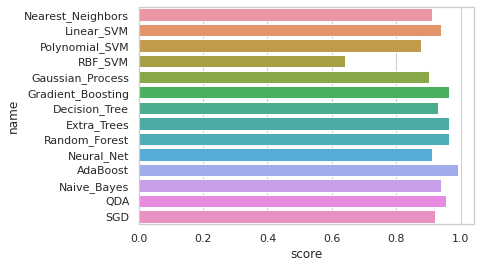

In [24]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

---